In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
spamtr = pd.read_csv("spam_train.csv")
spamte = pd.read_csv("spam_test.csv")
spamtr.head()
X_train =spamtr.drop('class',axis=1).values
Y_train = spamtr['class'].values
X_test = spamte.drop('class',axis=1).values
Y_test = spamte['class'].values

In [3]:
print("Keys of spam data set:\n", spamtr.keys())

Keys of spam data set:
 Index(['Unnamed: 0', 'word_freq_make', 'word_freq_address', 'word_freq_all',
       'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word

In [4]:
spamtr.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,3009,0.07,0.0,0.07,0.0,0.00,0.00,0.00,0.46,0.69,...,0.142,0.175,0.032,0.000,0.021,0.0,3.007,60,791,0
1,798,0.00,0.0,0.74,0.0,1.85,0.37,0.37,0.00,0.00,...,0.000,0.264,0.000,0.000,0.000,0.0,2.492,12,172,1
2,4396,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.763,0.0,2.181,6,24,0
3,353,0.00,0.0,0.32,0.0,0.65,0.65,0.32,0.32,0.00,...,0.000,0.105,0.000,0.000,0.158,0.0,1.494,10,139,1
4,574,1.03,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.176,0.176,0.0,2.766,26,83,1


In [5]:
print("Shape of data:", spamtr['Unnamed: 0'].shape)
print("Shape of data:", spamte['Unnamed: 0'].shape)

Shape of data: (3450,)
Shape of data: (1151,)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [7]:
#KNN
k_range=range(1,21)
acctrains = [] #to store Accuracy for different k
acctests = [] #to store Accuracy for different k
for K in k_range:
    model = KNeighborsClassifier(n_neighbors = K)
    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    acctrain = model.score(X_train,Y_train)
    acctest = model.score(X_test,Y_test)
    acctrains.append(acctrain)
    acctests.append(acctest)
    print('Training accuracy for k = ' , K , 'is:', acctrain)
    print('Testing accuracy value for k = ' , K , 'is:', acctest)

Training accuracy for k =  1 is: 1.0
Testing accuracy value for k =  1 is: 0.9973935708079931
Training accuracy for k =  2 is: 0.9991304347826087
Testing accuracy value for k =  2 is: 0.9939183318853171
Training accuracy for k =  3 is: 0.9985507246376811
Testing accuracy value for k =  3 is: 0.9956559513466551
Training accuracy for k =  4 is: 0.998840579710145
Testing accuracy value for k =  4 is: 0.9947871416159861
Training accuracy for k =  5 is: 0.998840579710145
Testing accuracy value for k =  5 is: 0.9973935708079931
Training accuracy for k =  6 is: 0.998840579710145
Testing accuracy value for k =  6 is: 0.9973935708079931
Training accuracy for k =  7 is: 0.998840579710145
Testing accuracy value for k =  7 is: 0.9973935708079931
Training accuracy for k =  8 is: 0.9991304347826087
Testing accuracy value for k =  8 is: 0.996524761077324
Training accuracy for k =  9 is: 0.9985507246376811
Testing accuracy value for k =  9 is: 0.9973935708079931
Training accuracy for k =  10 is: 0.998

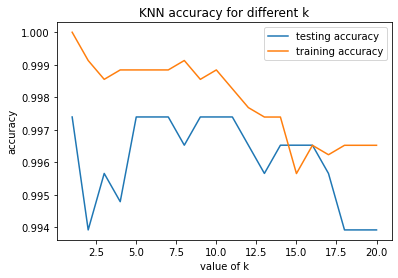

In [8]:
#plotting the accuracy against k values

plt.plot(k_range, acctests, label="testing accuracy")
plt.plot(k_range, acctrains, label="training accuracy")
plt.title("KNN accuracy for different k")
plt.xlabel("value of k")
plt.ylabel("accuracy")
plt.legend();

In [9]:
#logistic regression
C_range=range(1,11, 1)
acctrains = [] #to store Accuracy for different c
acctests = [] #to store Accuracy for different c
for c in C_range:
    model = LogisticRegression(C = c, solver ='liblinear')
    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    acctrain = model.score(X_train,Y_train)
    acctest = model.score(X_test,Y_test)
    acctrains.append(acctrain)
    acctests.append(acctest)
    print('Training accuracy for C = ' , c , 'is:', acctrain)
    print('Testing accuracy value for C = ' , c , 'is:', acctest)

Training accuracy for C =  1 is: 0.9768115942028985
Testing accuracy value for C =  1 is: 0.9756733275412685
Training accuracy for C =  2 is: 0.9843478260869565
Testing accuracy value for C =  2 is: 0.9826238053866203
Training accuracy for C =  3 is: 0.9805797101449275
Testing accuracy value for C =  3 is: 0.9782797567332754
Training accuracy for C =  4 is: 0.9855072463768116
Testing accuracy value for C =  4 is: 0.9860990443092963
Training accuracy for C =  5 is: 0.9898550724637681
Testing accuracy value for C =  5 is: 0.9887054735013032
Training accuracy for C =  6 is: 0.9892753623188406
Testing accuracy value for C =  6 is: 0.9878366637706343
Training accuracy for C =  7 is: 0.9776811594202899
Testing accuracy value for C =  7 is: 0.9765421372719374
Training accuracy for C =  8 is: 0.9953623188405797
Testing accuracy value for C =  8 is: 0.9939183318853171
Training accuracy for C =  9 is: 0.983768115942029
Testing accuracy value for C =  9 is: 0.9817549956559514
Training accuracy fo

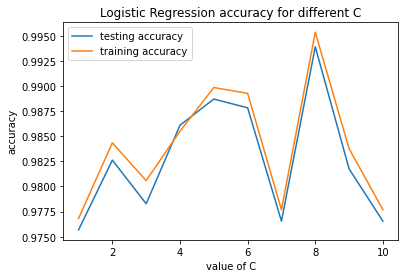

In [10]:
#plotting the accuracy against C

plt.plot(C_range, acctests, label="testing accuracy")
plt.plot(C_range, acctrains, label="training accuracy")
plt.title("Logistic Regression accuracy for different C")
plt.xlabel("value of C")
plt.ylabel("accuracy")
plt.legend();

In [11]:
#Linear SVM
C_range=np.arange(0.01, 20, 1)
acctrains = [] #to store Accuracy for different c
acctests = [] #to store Accuracy for different c
for c in C_range:
    model = LinearSVC(C=c)
    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    acctrain = model.score(X_train,Y_train)
    acctest = model.score(X_test,Y_test)
    acctrains.append(acctrain)
    acctests.append(acctest)
    print('Training accuracy for C = ' , c , 'is:', acctrain)
    print('Testing accuracy value for C = ' , c , 'is:', acctest)

Training accuracy for C =  0.01 is: 0.9176811594202898
Testing accuracy value for C =  0.01 is: 0.9183318853171155
Training accuracy for C =  1.01 is: 0.9484057971014492
Testing accuracy value for C =  1.01 is: 0.9513466550825369
Training accuracy for C =  2.01 is: 0.946376811594203
Testing accuracy value for C =  2.01 is: 0.947871416159861
Training accuracy for C =  3.01 is: 0.9617391304347827
Testing accuracy value for C =  3.01 is: 0.9661164205039097
Training accuracy for C =  4.01 is: 0.9411594202898551
Testing accuracy value for C =  4.01 is: 0.947002606429192
Training accuracy for C =  5.01 is: 0.4142028985507246
Testing accuracy value for C =  5.01 is: 0.4439617723718506
Training accuracy for C =  6.01 is: 0.9295652173913044
Testing accuracy value for C =  6.01 is: 0.9383145091225021
Training accuracy for C =  7.01 is: 0.9347826086956522
Testing accuracy value for C =  7.01 is: 0.9331016507384883
Training accuracy for C =  8.01 is: 0.9501449275362319
Testing accuracy value for C

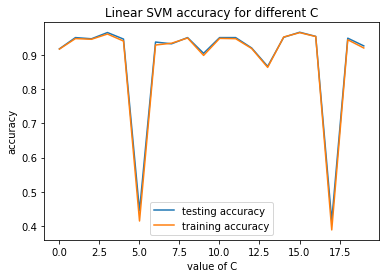

In [12]:
#plotting the accuracy against C

plt.plot(C_range, acctests, label="testing accuracy")
plt.plot(C_range, acctrains, label="training accuracy")
plt.title("Linear SVM accuracy for different C")
plt.xlabel("value of C")
plt.ylabel("accuracy")
plt.legend();

In [13]:
#linear_svm=LinearSVC().fit(X_train,Y_train)
#train_score=linear_svm.score(X_train,Y_train)
#test_score=linear_svm.score(X_test,Y_test)
cvalues=np.arange(0.01, 20,1)
train_accuracy=np.empty(len(cvalues))
test_accuracy=np.empty(len(cvalues))
for i,k in enumerate(cvalues):
    linear_svm1=LinearSVC(C=k).fit(X_train,Y_train)
    train_accuracy[i]=linear_svm1.score(X_train,Y_train)
    test_accuracy[i]=linear_svm1.score(X_test,Y_test)

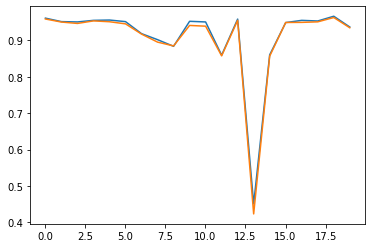

In [14]:
plt.plot(cvalues,test_accuracy)
plt.plot(cvalues, train_accuracy)